# **Entrega 3 - Aprendizaje de máquinas**


In [ ]:
#@markdown ------
#@markdown #### **Importaciones para el desarrollo**
import numpy as np
from matplotlib import pyplot as plt
import cv2
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
import time
#@markdown ------

In [ ]:
#@markdown ----
#@markdown #### **Importar herramientas para segmentacion**
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Semestre_9/machine_learning
#@markdown ----

Mounted at /content/drive
/content/drive/MyDrive/Semestre_9/machine_learning


## **Ejercicio 1 - ```DBSCAN``` (C = 1.0)**

Implemente el algoritmo de ```DBSCAN``` para agrupar el subconjunto de datos ```train_data```. Para determinar el número correcto de clusters, use el análisis por el método del codo y de la silueta, de tal manera que encuentre la mejor combinación de parámetros para ```DBSCAN``` que le permita obtener el mejor desempeño. Al final, justifique a través de un párrafo corto su elección de parámetros.

**NOTA:** Los datos se generarán de acuerdo a su número se CC. Por favor, ingrese su número en la línea indicada.

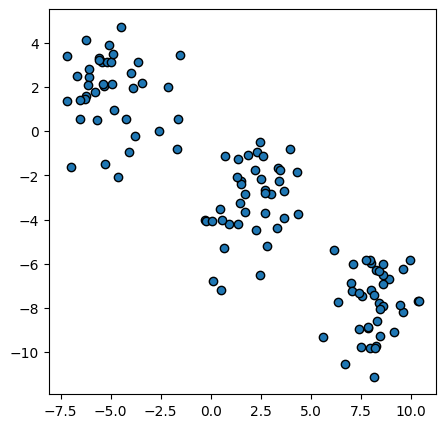

In [ ]:
#@markdown ------
#@markdown #### **⚠️ Ingrese su número de CC**. ⬇

!gdown -qq "https://drive.google.com/uc?id=1_aBCW63crUL_mPwE8ATzCtsjNa5rRiUL" -O /eval_tools-1.1-py3-none-any.whl
!pip3 -qq install /eval_tools-1.1-py3-none-any.whl
!rm -r /eval_tools-1.1-py3-none-any.whl

import matplotlib.pyplot as plt
from eval_tools import import_data_from_CC

CC = None #@param {type:"number"}

_, train_data, _, _ = import_data_from_CC (CC)

_, axes = plt.subplots(figsize=(5,5))
axes.scatter(train_data[:, 0], train_data[:, 1], edgecolors='k')

#@markdown ------

Verifique las variables ```train_data```

In [ ]:
print (train_data.shape)

(120, 2)


X_train: (96, 2), X_test: (24, 2)


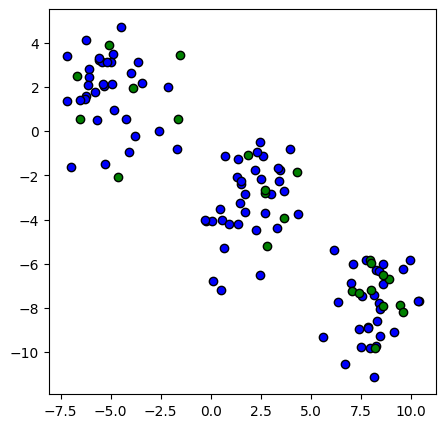

In [ ]:
# Train test split
X_train, X_test = train_test_split(train_data, test_size=0.2, random_state=10)
print(f'X_train: {X_train.shape}, X_test: {X_test.shape}')

_, ax = plt.subplots(figsize = (5,5))
ax.scatter(X_train[:, 0], X_train[:, 1], c='b', edgecolors='k')
ax.scatter(X_test[:, 0], X_test[:, 1], c='g', edgecolors='k')
plt.show()

Text(0.5, 1.0, 'Silhouette')

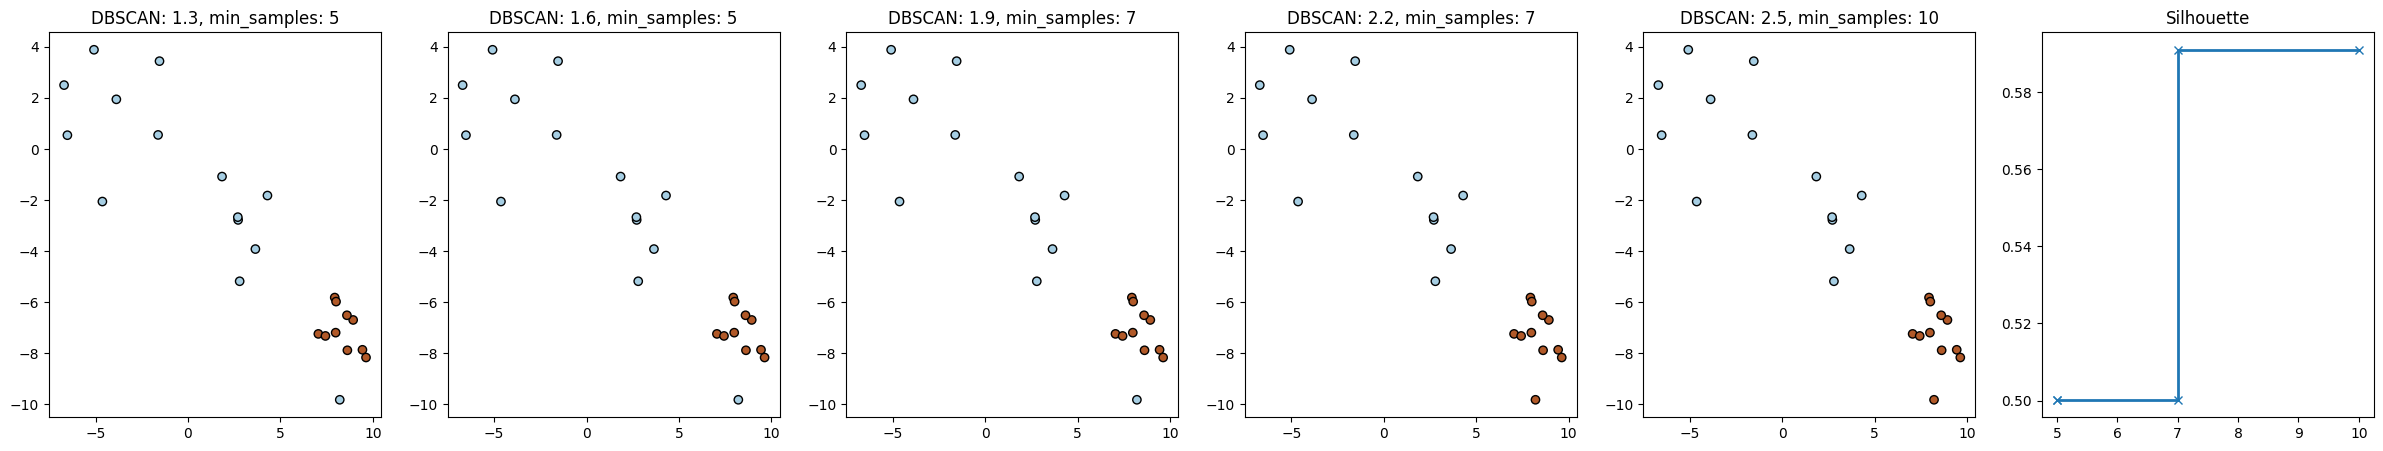

In [ ]:
clusters = [5, 5, 7, 7, 10]
option_eps = [1.3, 1.6, 1.9, 2.2, 2.5]
silhouette_distances = []

_, axes = plt.subplots(1, 6, figsize=(30,5))

for cluster, eps, ax in zip(clusters, option_eps, axes):
  dbscan = DBSCAN(eps = eps , min_samples = cluster )
  predictions = dbscan.fit_predict(X_test)

  ax.scatter(X_test[:, 0], X_test[:, 1], c=predictions, edgecolors='k', cmap='Paired')
  ax.set_title(f'DBSCAN: {eps}, min_samples: {cluster}')

  distance = silhouette_score(X_test, predictions, metric="euclidean")
  silhouette_distances.append(distance)

axes[5].plot( clusters , silhouette_distances , marker="x", linewidth=2)
axes[5].set_title('Silhouette')

In [ ]:
##---- Justificacion ----##
# De acuerdo a lo opservado se puede notar que usando un eps entre 1.3 y 1.9 con una variacion en su min_samples de 5-7 estas arrojan un resultado similar
# y usando un eps entre 2.2 y 2.5 con el min_samples de 7 arroja tambien un resultado similar pero mucho mas acertado a lo esperado
#por ende se puede concluir que usando una configuracion en DBSCAN de eps=2.5 y min_samples de 7 se consigue un resultado esperado

## **Ejercicio 2 - ```MeanShift``` vs ```DBSCAN``` (C = 2.0)**

Compare el desempeño con ```MeanShift``` y ```DBSCAN```. Para esto, configure ambos algoritmos con la mejor selección de parámetros posible para obtener los mejores desempeños. Calcule métricas mencionadas debajo sobre el subconjunto, y determine el mejor modelo. Justifique su elección a través de estas métricas.

Métricas:
- Adjusted Rand Index
- Adjusted Mutual Information score
- Silhouette

**NOTA:** Los datos se generarán de acuerdo a su número se CC. Por favor, ingrese su número en la línea indicada.


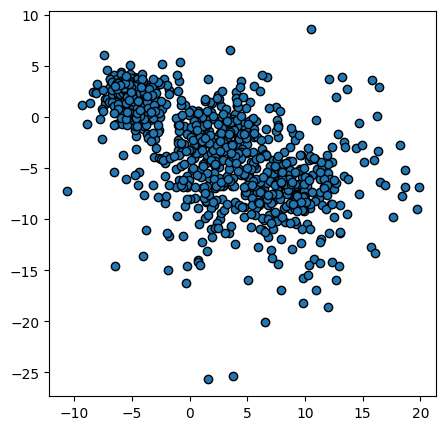

In [ ]:
#@markdown ------
#@markdown #### **⚠️ Ingrese su número de CC**. ⬇

!gdown -qq "https://drive.google.com/uc?id=1_aBCW63crUL_mPwE8ATzCtsjNa5rRiUL" -O /eval_tools-1.1-py3-none-any.whl
!pip3 -qq install /eval_tools-1.1-py3-none-any.whl
!rm -r /eval_tools-1.1-py3-none-any.whl

import matplotlib.pyplot as plt
from eval_tools import import_data_from_CC

CC = 1001812708 #@param {type:"number"}
train_data, _, train_targets, _ = import_data_from_CC (CC, algorithm='unequal_var')

_, axes = plt.subplots(figsize=(5,5))
axes.scatter(train_data[:, 0], train_data[:, 1], edgecolors='k')

#@markdown ------

Verifique las variables ```train_data```, ```test_data```

In [ ]:
print (train_data.shape, train_targets.shape)

(1000, 2) (1000,)


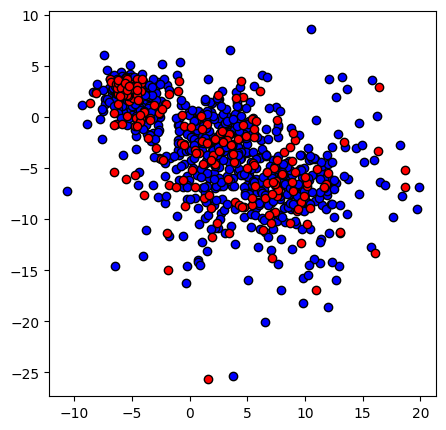

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_data, train_targets, test_size=0.2, random_state=10)

_, ax = plt.subplots(figsize=(5,5))
ax.scatter(X_train[:, 0], X_train[:, 1], c='b', edgecolors='k')
ax.scatter(X_test[:, 0], X_test[:, 1], c='r', edgecolors='k')

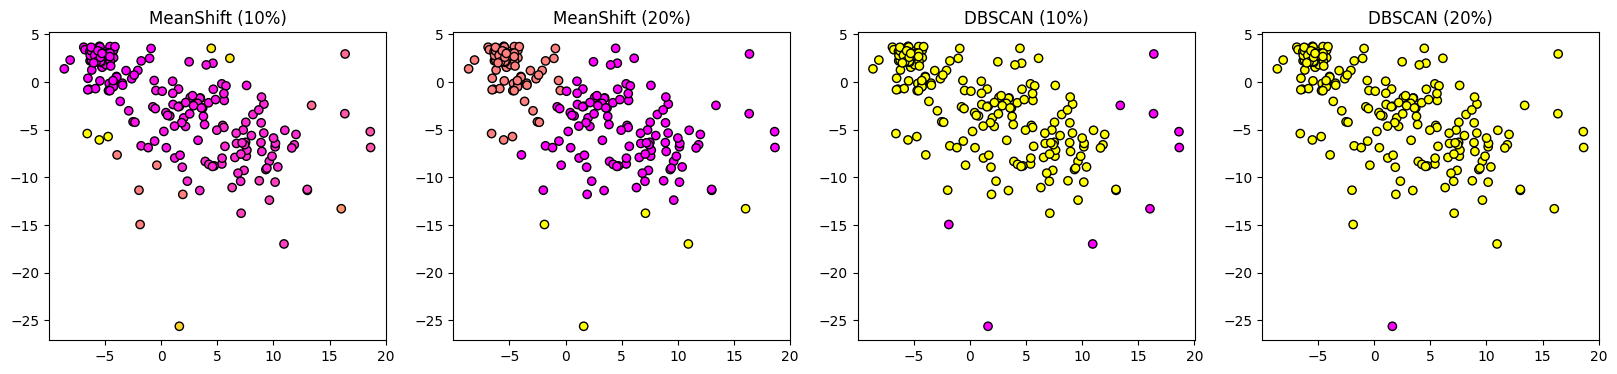

In [ ]:
models = [MeanShift(bandwidth=32*0.1), MeanShift(bandwidth=32*0.2), DBSCAN(eps = 32*0.1, min_samples= 5), DBSCAN(eps = 32*0.2, min_samples= 5)]
models_name = ['MeanShift (10%)', 'MeanShift (20%)', 'DBSCAN (10%)', 'DBSCAN (20%)']
predictions = {}

_, axes = plt.subplots(1, len(models_name), figsize=(5*len(models_name), 4))

for model, name, ax in zip(models, models_name, axes):
    # Instance and train
    model.fit(X_train)
    # Predictions on train and test sets
    if isinstance(model,DBSCAN):
     predictions[name]=model.fit_predict(X_test)
    else:
     predictions[name]=model.predict(X_test)

    ax.scatter(X_test[:,0],X_test[:,1],c=predictions[name],cmap='spring',edgecolors='k')
    ax.set_title(name)

In [ ]:
for model_name in models_name :
  print ("########----- Results for {0} -----########".format( model_name ))
  ari = adjusted_rand_score( y_test , predictions[model_name] )
  ami = adjusted_mutual_info_score( y_test , predictions[model_name] )
  sil= silhouette_score(X_test , predictions[model_name],metric='euclidean')
  ##--------------
  print("-- ARI --\t -- AMI --\t -- SIL--")
  print(" {0:.3f}  \t {1:.3f}  \t {2:.3f}  \t".format(ari, ami,sil))

########----- Results for MeanShift (10%) -----########
-- ARI --	 -- AMI --	 -- SIL--
 0.441  	 0.529  	 0.396  	
########----- Results for MeanShift (20%) -----########
-- ARI --	 -- AMI --	 -- SIL--
 0.261  	 0.416  	 0.491  	
########----- Results for DBSCAN (10%) -----########
-- ARI --	 -- AMI --	 -- SIL--
 0.011  	 0.077  	 0.433  	
########----- Results for DBSCAN (20%) -----########
-- ARI --	 -- AMI --	 -- SIL--
 0.000  	 0.000  	 0.574  	


In [ ]:
#justificacion
# de acuerdo a lo observado por las metricas el meanshift empleado al 10% da mejores resultados en ARI y AMI aunque su SIL es muy por debajo del empleado al 20%
# por ende se concluye que usar el mean shift al 10% es la mejor opcion

#respecto a DBSCAN sus metricas empleadas al 10% son muy superiores a las empleadas en 20% por ende la mejor opcion es DBSCAN con un eps del 10%

## **Ejercicio 3 - ```MeanShift``` vs ```DBSCAN``` - imágenes (C = 2.0)**


Use las siguientes imágenes para realizar segmentación semántica usando ```MeanShift``` y ```DBSCAN```. \\

**NOTA:** Ejecutar la segmentación no deberá durar más que unos segundos. En caso de demorar demasiado, se le penalizará en la nota.

In [ ]:
#@markdown ------
#@markdown #### **⚠️❗ Ejecute esta celda para descargar los archivos necesario**
#@markdown  \\
#@markdown Esta celda creará la carpeta ```images_E3```, en donde encontrará las imágenes con las que deberá trabajar

# for c in concepts_list:
!gdown -qq "https://drive.google.com/uc?id=17csEqkQPPaepgNe9mqKccZaNEah8powd" -O /sample_images.zip
!unzip -qq /sample_images.zip -d /content/images_E3/
!rm -r /sample_images.zip /content/images_E3/__MACOSX
#@markdown ------

Verifique que en el directorio ```images_E3``` se encuentran las imágenes

In [ ]:
!ls images_E3/

ls: cannot access 'images_E3/': No such file or directory


In [ ]:
from Tools.tools_machine_learning import segmentation_image

###----- Segmentation with DBSCAN -----###
Image Shape original: (378, 640, 3)
Image Shape resize: (100, 150, 3)
Image Shape Vectorized: (15000, 1)
eps: 0.78 min_samples: 150
Predictions shape: (15000,)
Tiempo de ejecucion: 0.1795


/content/drive/MyDrive/Semestre_9/machine_learning/Tools/tools_machine_learning.py:81: RuntimeWarning: overflow encountered in scalar subtract
  eps=abs(img_hsv[:,:,0].min()-img_hsv[:,:,0].max())*0.01


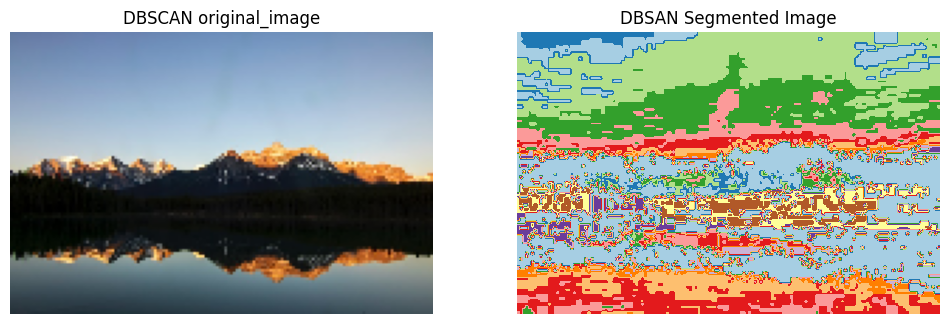

In [ ]:
#segmentation image #1
path = '/content/images_E3/im_01.jpg'
#DBSCAN
start_time = time.time()
segmentation_image(path)
end_time = time.time()
print(f'Tiempo de ejecucion: {round(end_time-start_time,4)}')

###----- Segmentation with MeanShift -----###
Image Size original: (640, 378)
Image Size resize: (150, 100)
Image RGB Shape: (100, 150, 3), Image HSV Shape: (100, 150, 3)
Image Shape Vectorized: (15000, 1)
Clustered Shape: (100, 150)
Tiempo de ejecucion: 36.088


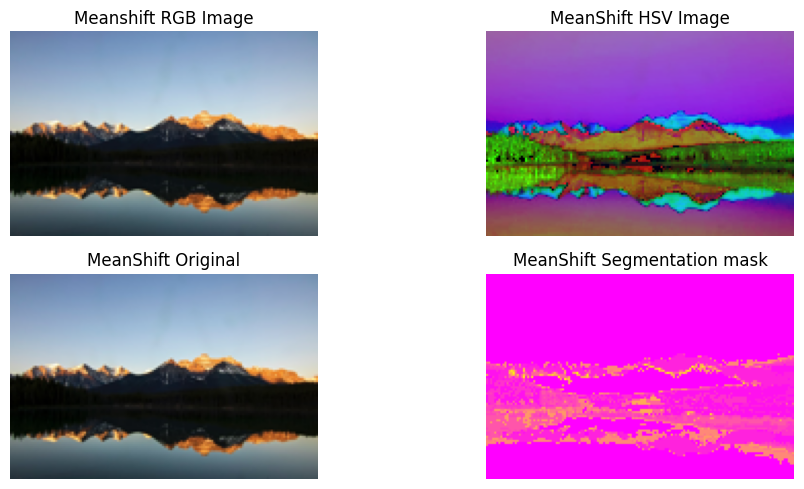

In [ ]:
#MeanShift
start_time = time.time()
segmentation_image(path, model='meanshift')
end_time = time.time()
print(f'Tiempo de ejecucion: {round(end_time-start_time,4)}')

###----- Segmentation with DBSCAN -----###
Image Shape original: (1786, 1832, 3)
Image Shape resize: (100, 150, 3)
Image Shape Vectorized: (15000, 1)
eps: 0.78 min_samples: 150


/content/drive/MyDrive/Semestre_9/machine_learning/Tools/tools_machine_learning.py:81: RuntimeWarning: overflow encountered in scalar subtract
  eps=abs(img_hsv[:,:,0].min()-img_hsv[:,:,0].max())*0.01


Predictions shape: (15000,)
Tiempo de ejecucion: 0.6984


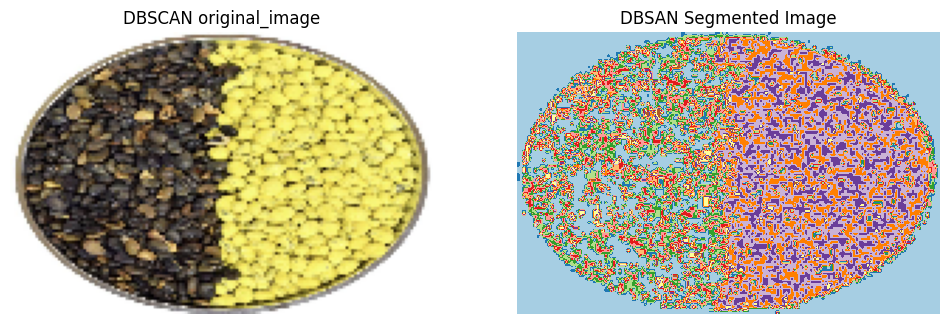

In [ ]:
#segmentation image #2
path = '/content/images_E3/im_02.png'
#DBSCAN
start_time = time.time()
segmentation_image(path)
end_time = time.time()
print(f'Tiempo de ejecucion: {round(end_time-start_time,4)}')

###----- Segmentation with MeanShift -----###
Image Size original: (1832, 1786)
Image Size resize: (150, 100)
Image RGB Shape: (100, 150, 3), Image HSV Shape: (100, 150, 3)
Image Shape Vectorized: (15000, 1)
Clustered Shape: (100, 150)
Tiempo de ejecucion: 26.9603


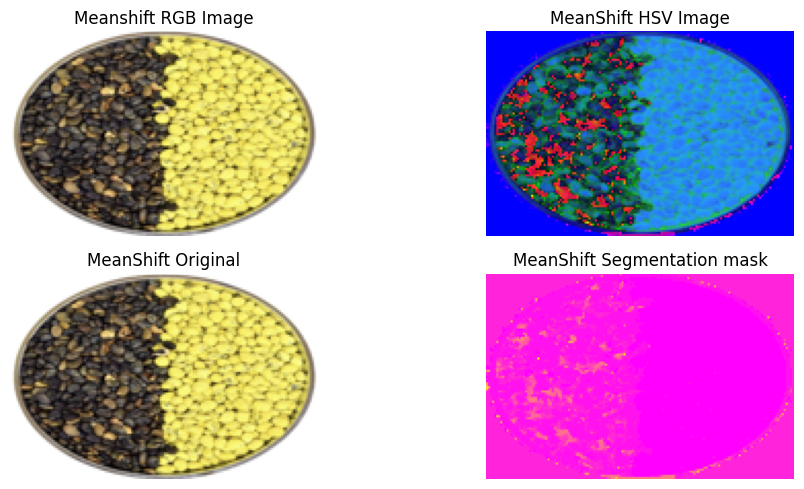

In [ ]:
#MeanShift
start_time = time.time()
segmentation_image(path, model='meanshift')
end_time = time.time()
print(f'Tiempo de ejecucion: {round(end_time-start_time,4)}')

###----- Segmentation with DBSCAN -----###
Image Shape original: (669, 747, 3)
Image Shape resize: (100, 150, 3)
Image Shape Vectorized: (15000, 1)
eps: 1.3900000000000001 min_samples: 150


/content/drive/MyDrive/Semestre_9/machine_learning/Tools/tools_machine_learning.py:81: RuntimeWarning: overflow encountered in scalar subtract
  eps=abs(img_hsv[:,:,0].min()-img_hsv[:,:,0].max())*0.01


Predictions shape: (15000,)
Tiempo de ejecucion: 0.6952


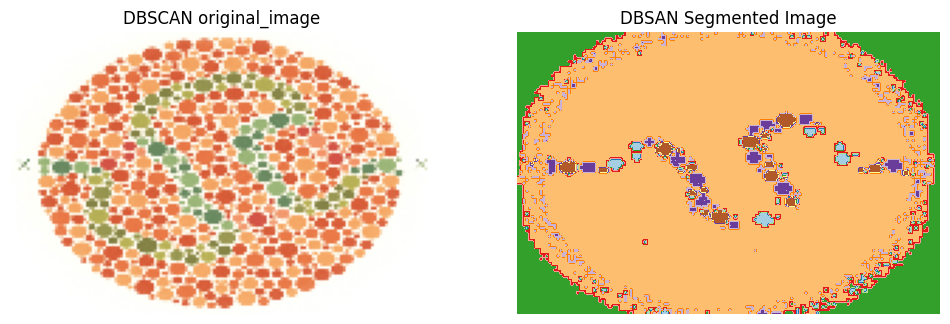

In [ ]:
#segmentation image #3
path = '/content/images_E3/im_03.png'
#DBSCAN
start_time = time.time()
segmentation_image(path)
end_time = time.time()
print(f'Tiempo de ejecucion: {round(end_time-start_time,4)}')

###----- Segmentation with MeanShift -----###
Image Size original: (747, 669)
Image Size resize: (150, 100)
Image RGB Shape: (100, 150, 3), Image HSV Shape: (100, 150, 3)
Image Shape Vectorized: (15000, 1)
Clustered Shape: (100, 150)
Tiempo de ejecucion: 29.6304


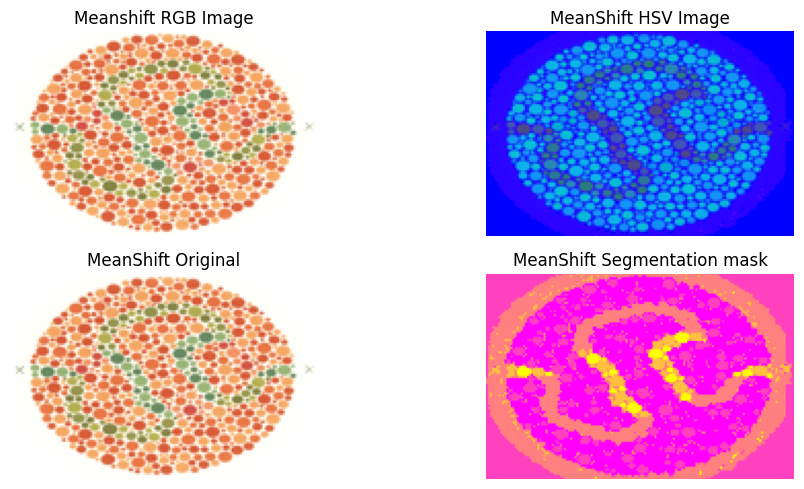

In [ ]:
#MeanShift
start_time = time.time()
segmentation_image(path, model='meanshift')
end_time = time.time()
print(f'Tiempo de ejecucion: {round(end_time-start_time,4)}')